# Cooperation in HCV IRES translation 

In [9]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import math as m


We have the following equations for the concentration of IRES ($I_i$), translation cofactors ($F$) and proteins ($P_i$) over time.

## Model 1: No interactions

We propose two alternative models. 

\begin{align}
&\frac{dF}{dt} = r_F F \left( 1 - \frac{F}{K_F}\right) - \sum_i^n \mu_i F I_i - \delta_F F  \\
&\frac{dP_i}{dt} = r_P \kappa_i\mu_iFI_i \left( 1 - \frac{\kappa_i\mu_iFI_i}{K_P}\right) - \delta_P \kappa_i\mu_iFI_i \\
&\frac{dI_i}{dt} = - \mu_i F I_i - \delta_I I_i\\
\end{align}

## Model 2: IRES variants interaction model

And one in which $K_*$ respond to the concentration of both, proteins ($P_i$) and cofactors ($F$), respectively:

\begin{align}
&\frac{dF}{dt} = r_F F \left( 1 - \frac{F}{K_F}\right) - \sum_i^n \mu_i F I_i - \delta_F F  \\
%&\frac{dP_i}{dt} = r_P \kappa_i\mu_iFI_i \left( 1 - \frac{\kappa_i (\mu_iFI_i + \alpha_j\mu_jFI_j)}{K_P}\right) - \delta_P\kappa_i (\mu_iFI_i + \alpha_j\mu_jFI_j) \\
&\frac{dP_i}{dt} = r_P \kappa_i\mu_iFI_i \left( 1 - \frac{\kappa_i \mu_iF (I_i + \alpha_{ij}I_j)}{K_P}\right) - \delta_P \kappa_i \mu_iF I_i \\
&\frac{dP_j}{dt} = r_P \kappa_j\mu_jFI_j \left( 1 - \frac{\kappa_j \mu_jF (I_j + \alpha_{ji}I_i)}{K_P}\right) - \delta_P \kappa_j \mu_jF I_j \\
&\frac{dI_i}{dt} = - \kappa_i\mu_i F (I_i + \alpha_{ij}I_j) - \delta_I I_i\\
&\frac{dI_j}{dt} = - \kappa_j\mu_j F (I_j + \alpha_{ji}I_i) - \delta_I I_j\\
\end{align}

The value of $\alpha$, represents the degree of 'cooperation'.

## Model 3: Protein-Resources and IRES-IRES interaction model

\begin{align}
&\frac{dF}{dt} = r_F F \left( 1 - \frac{F+\sum_l^n \theta_l\kappa_l\mu_lFI_l}{K_F}\right) - \sum_l^n \mu_lFI_l - \delta_F F \\
&\frac{dP_i}{dt} = r_P \kappa_i\mu_iFI_i \left( 1 - \frac{\kappa_i \mu_iF (I_i + \alpha_{ij}I_j) +\lambda_i F }{K_P}\right) - \delta_P \kappa_i \mu_iF I_i \\
&\frac{dP_j}{dt} = r_P \kappa_j\mu_jFI_j \left( 1 - \frac{\kappa_j \mu_jF (I_j + \alpha_{ji}I_i) +\lambda_j F }{K_P}\right) - \delta_P \kappa_j \mu_jF I_j \\
%&\frac{dP_i}{dt} = r_Pk_iFI_i \left( 1 - \frac{k_iFI_i + \theta_i F + \alpha_{ij} k_jFI_j}{K_P}\right) - \delta_P k_iFI_i \\
%&\frac{dP_j}{dt} = r_Pk_jFI_j \left( 1 - \frac{k_jFI_j+ \theta_j F + \alpha_{ji} k_iFI_i}{K_P}\right) - \delta_P k_jFI_j \\
%&\frac{dF}{dt} = r_F F \left( 1 - \frac{F\color{red}+\alpha\sum_i^n k_iFI_i}{K_F}\right) - \gamma\sum_i^n k_iFI_i - \delta_F F \\
&\frac{dI_i}{dt} = - \kappa_i\mu_i F (I_i + \alpha_{ij}I_j) - \delta_I I_i\\
&\frac{dI_j}{dt} = - \kappa_j\mu_j F (I_j + \alpha_{ji}I_i) - \delta_I I_j\\
\end{align}

## Simulation: two IRES variants Model 1 & Model 2.

In [288]:
#General parameters
rf = 0.05
rp = 0.05
KF = 1000
KP = 1000

ui = 0.0011
uj = 0.0021
ki = 0.02
kj = 0.05

df = 0.01
dp = 0.01
di = 0.001

aij = 0.5
aji = 0.5

In [290]:
def model1(x, t):    
    # assign each ODE to a vector element
    F = x[0]
    Pi = x[1]
    Ii = x[2]
    Pj = x[3]
    Ij = x[4]

    # define each ODE
    dFdt = rf*F*(1-F/KF) - ui*F*Ii - uj*F*Ij - df*F
    dPidt = rp*ki*ui*F*Ii*( 1 - (ki*ui*F*Ii)/KP) - dp*ki*ui*F*Ii
    dPjdt = rp*kj*uj*F*Ij*( 1 - (kj*uj*F*Ij)/KP) - dp*kj*uj*F*Ij
    dIidt = -ui*F*Ii - di*Ii
    dIjdt = -uj*F*Ij - di*Ij
 
    return [dFdt, dPidt, dIidt, dPjdt, dIjdt]

In [292]:
def model2(x, t):
    # assign each ODE to a vector element
    F = x[0]
    Pi = x[1]
    Ii = x[2]
    Pj = x[3]
    Ij = x[4]    

    # define each ODE
    # define each ODE
    dFdt = rf*F*(1-F/KF) - ui*F*Ii - uj*F*Ij - df*F
    dPidt = rp*ki*ui*F*Ii*( 1 - (ki*ui*F*(Ii + aij*Ij))/KP) - dp*ki*ui*F*Ii
    dPjdt = rp*kj*uj*F*Ij*( 1 - (kj*uj*F*(Ij + aji*Ii))/KP) - dp*kj*uj*F*Ij
    dIidt = -ui*F*(Ii + aij*Ij) - di*Ii
    dIjdt = -uj*F*(Ij + aji*Ii) - di*Ij
 
    return [dFdt, dPidt, dIidt, dPjdt, dIjdt]

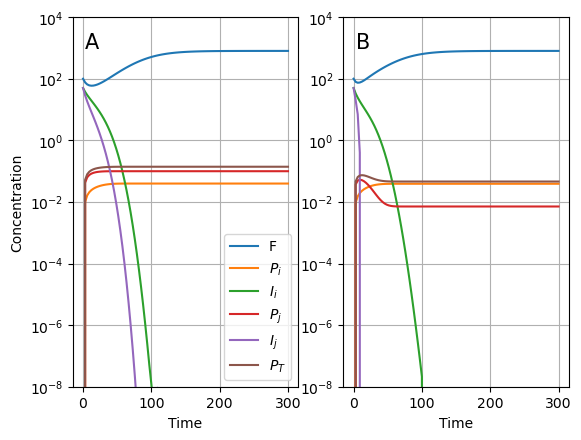

In [294]:

# initial conditions
x0 = [100, 0, 50, 0, 50]

# declare a time vector (time window)
t = np.linspace(0,300,100)

x1 = odeint(model1,x0,t)
aF = x1[:,0]
aPi = x1[:,1]
aIi = x1[:,2]
aPj = x1[:,3]
aIj = x1[:,4]
aPt = x1[:,1] + x1[:,3]

x2 = odeint(model2,x0,t)
bF = x2[:,0]
bPi = x2[:,1]
bIi = x2[:,2]
bPj = x2[:,3]
bIj = x2[:,4]
bPt = x2[:,1] + x2[:,3]

# plot the results
fig, ax = plt.subplots(1,2)
lf, = ax[0].semilogy(t,aF)
l1, = ax[0].semilogy(t,aPi)
l2, = ax[0].semilogy(t,aIi)
l3, = ax[0].semilogy(t,aPj)
l4, = ax[0].semilogy(t,aIj)
l5, = ax[0].semilogy(t,aPt)

lf, = ax[1].semilogy(t,bF)
l1, = ax[1].semilogy(t,bPi)
l2, = ax[1].semilogy(t,bIi)
l3, = ax[1].semilogy(t,bPj)
l4, = ax[1].semilogy(t,bIj)
l5, = ax[1].semilogy(t,bPt)

ax[0].legend((lf, l1, l2,l3, l4, l5), ('F', '$P_i$', '$I_i$', '$P_j$', '$I_j$', '$P_T$'), loc='lower right', shadow=False)
ax[0].set_xlabel('Time')
ax[1].set_xlabel('Time')
ax[0].set_ylabel('Concentration')
ax[0].set_ylim(10E-9, 10E3)
ax[1].set_ylim(10E-9, 10E3)
ax[0].grid()
ax[1].grid()
ax[0].text(3, 1000, 'A', fontsize=15)
ax[1].text(3, 1000, 'B', fontsize=15)
#plt.show()
plt.savefig('compare_model_1_2_alphaPositive.png')

Under the same conditions, but with a larger $\alpha$ value of interaction, populations of IRES remain during a larger period. 

## Simulation: two IRES variants and protein resource interation. Model 1 & Model 3.

In [37]:
#General parameters
rf = 0.05
rp = 0.05
KF = 1000
KP = 1000

ui = 0.0011
uj = 0.0021
ki = 0.05
kj = 0.05

df = 0.01
dp = 0.01
di = 0.001

ti = 0
tj = 0
li = -10
lj = -10
aij = 0.3
aji = 0.3

In [39]:
def model1(x, t):    
    # assign each ODE to a vector element
    F = x[0]
    Pi = x[1]
    Ii = x[2]
    Pj = x[3]
    Ij = x[4]

    # define each ODE
    dFdt = rf*F*(1-F/KF) - ui*F*Ii - uj*F*Ij - df*F
    dPidt = rp*ki*ui*F*Ii*( 1 - (ki*ui*F*Ii)/KP) - dp*ki*ui*F*Ii
    dPjdt = rp*kj*uj*F*Ij*( 1 - (kj*uj*F*Ij)/KP) - dp*kj*uj*F*Ij
    dIidt = -ui*F*Ii - di*Ii
    dIjdt = -uj*F*Ij - di*Ij
 
    return [dFdt, dPidt, dIidt, dPjdt, dIjdt]

In [41]:
def model3(x, t):
    # assign each ODE to a vector element
    F = x[0]
    Pi = x[1]
    Ii = x[2]
    Pj = x[3]
    Ij = x[4]    

    # define each ODE
    # define each ODE
    dFdt = rf*F*(1-(F + ti*ki*ui*F*Ii + tj*kj*uj*F*Ij)/KF) - ui*F*Ii - uj*F*Ij - df*F
    dPidt = rp*ki*ui*F*Ii*( 1 - (ki*ui*F*(Ii + aij*Ij)+li*F)/KP) - dp*ki*ui*F*Ii
    dPjdt = rp*kj*uj*F*Ij*( 1 - (kj*uj*F*(Ij + aji*Ii)+lj*F)/KP) - dp*kj*uj*F*Ij
    dIidt = -ui*F*(Ii + aij*Ij) - di*Ii
    dIjdt = -uj*F*(Ij + aji*Ii) - di*Ij
 
    return [dFdt, dPidt, dIidt, dPjdt, dIjdt]

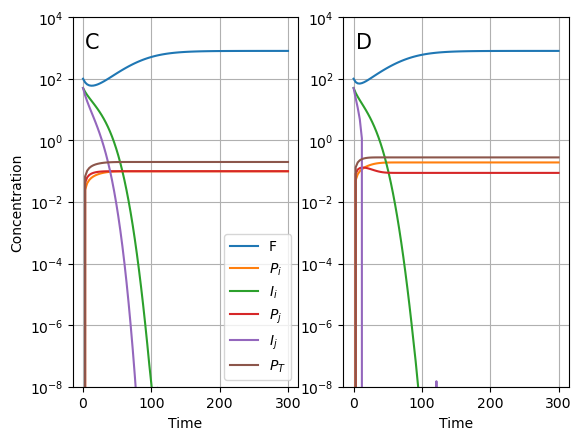

In [43]:

# initial conditions
x0 = [100, 0, 50, 0, 50]

# declare a time vector (time window)
t = np.linspace(0,300,100)

x1 = odeint(model1,x0,t)
aF = x1[:,0]
aPi = x1[:,1]
aIi = x1[:,2]
aPj = x1[:,3]
aIj = x1[:,4]
aPt = x1[:,1] + x1[:,3]

x2 = odeint(model3,x0,t)
bF = x2[:,0]
bPi = x2[:,1]
bIi = x2[:,2]
bPj = x2[:,3]
bIj = x2[:,4]
bPt = x2[:,1] + x2[:,3]

# plot the results
fig, ax = plt.subplots(1,2)
lf, = ax[0].semilogy(t,aF)
l1, = ax[0].semilogy(t,aPi)
l2, = ax[0].semilogy(t,aIi)
l3, = ax[0].semilogy(t,aPj)
l4, = ax[0].semilogy(t,aIj)
l5, = ax[0].semilogy(t,aPt)

lf, = ax[1].semilogy(t,bF)
l1, = ax[1].semilogy(t,bPi)
l2, = ax[1].semilogy(t,bIi)
l3, = ax[1].semilogy(t,bPj)
l4, = ax[1].semilogy(t,bIj)
l5, = ax[1].semilogy(t,bPt)

ax[0].legend((lf, l1, l2,l3, l4, l5), ('F', '$P_i$', '$I_i$', '$P_j$', '$I_j$', '$P_T$'), loc='lower right', shadow=False)
ax[0].set_xlabel('Time')
ax[1].set_xlabel('Time')
ax[0].set_ylabel('Concentration')
ax[0].set_ylim(10E-9, 10E3)
ax[1].set_ylim(10E-9, 10E3)
ax[0].grid()
ax[1].grid()
ax[0].text(3, 1000, 'C', fontsize=15)
ax[1].text(3, 1000, 'D', fontsize=15)
#plt.show()
plt.savefig('compare_model_1_3_coefNegative.png')

#### Checking total protein at equilibrium

In [45]:
print(sum(aPt),'\t', sum(bPt))

19.082727301852962 	 27.242579875453664
